In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("../processed-datasets/feature-dataset.csv", sep="$")

df.head()

,class,url,status_code,meta_info,length,nb_hyphen,nb_cdn,nb_digits,nb_adword,nb_subdomains
0,0,https://crowdyfan.com/,200,Crowdyfan Sports News Nutrition More,22,0,0,0,0,0
1,0,https://dreamaways.com/,403,403 Forbidden,23,0,0,0,0,0
2,0,https://www.worldtravelserver.com/,200,London travel agencies United Kingdom weather ...,34,0,0,0,0,1
3,0,https://www.baarty.com/,200,Soluciones Para Bares Baartycom,23,0,0,0,0,1
4,0,https://ladamotors63.ru/,200,Lada Motors,24,0,0,2,1,0


In [2]:
df.shape

(74198, 10)

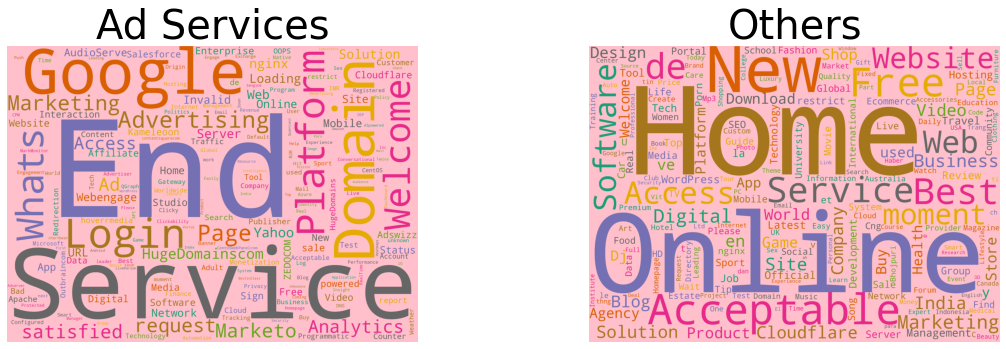

In [3]:
from wordcloud import WordCloud,STOPWORDS

STOPWORDS.update(["Unavailable", "Error", "Forbidden", "Temporarily", "None", "Found", "Denied", "Dead"])

plt.figure(figsize=(40,25))
subset = df[df['class']==1]
text = subset.meta_info.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(4,4,1)
plt.axis('off')
plt.title("Ad Services",fontsize=40)
plt.imshow(cloud1)
subset = df[df['class']==0]
text = subset.meta_info.values
cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(4,4,2)
plt.axis('off')
plt.title("Others",fontsize=40)
plt.imshow(cloud2)

In [4]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()
def tokenizer(text):
        return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = df[['meta_info', 'status_code', 'length', 'nb_hyphen','nb_cdn', 'nb_digits', 'nb_adword', 'nb_subdomains']]

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

column_transformer = ColumnTransformer([('tfidf', tfidf, 'meta_info')])

## SVM

In [14]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

kernels = ["poly", "rbf", "linear", "sigmoid"]

for kernel in kernels:

    pipe = Pipeline([
        ('tfidf', column_transformer),
        ('classify', SVC(kernel=kernel))
    ])

    pipe.fit(X_train,y_train)

    print (kernel, pipe.score(X_test, y_test))

poly 0.8988401535571346
rbf 0.8982275586049171
linear 0.8925916850445152
sigmoid 0.8784611614800294


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1)

pipe = Pipeline([
    ('tfidf', column_transformer),
    ('classify', lr)
])
    
pipe.fit(X_train,y_train)
    
print ("Logistic Regression Accuracy: ", pipe.score(X_test, y_test))

/home/yk/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yk/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Logistic Regression Accuracy:  0.8964306134117455


## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression(n_jobs=-1)

pipe = Pipeline([
    ('tfidf', column_transformer),
    ('classify', linearRegression)
])
    
pipe.fit(X_train,y_train)
    
print ("Linear Regression Accuracy: ", pipe.score(X_test, y_test))

Linear Regression Accuracy:  0.3536553001087811


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [3, 5, 7, 9, 11, 15, 17, 19, 21, 23, 25]

for n in neighbors:
    
    pipe = Pipeline([
        ('tfidf', column_transformer),
        ('classify', KNeighborsClassifier(n_neighbors=n, n_jobs=-1))
    ])
    
    pipe.fit(X_train,y_train)
    
    print ("KNN with", n, "neighbor accuracy: ", pipe.score(X_test, y_test))

KNN with 3 neighbor accuracy:  0.8871600098015192
KNN with 5 neighbor accuracy:  0.8827084864820713
KNN with 7 neighbor accuracy:  0.8834436004247325
KNN with 9 neighbor accuracy:  0.8837294780691007
KNN with 11 neighbor accuracy:  0.8798088703749081
KNN with 15 neighbor accuracy:  0.8808298619619375
KNN with 17 neighbor accuracy:  0.8804214653271257
KNN with 19 neighbor accuracy:  0.8795229927305399
KNN with 21 neighbor accuracy:  0.8782978028261047
KNN with 23 neighbor accuracy:  0.8776035285469248
KNN with 25 neighbor accuracy:  0.8767867352773013
